# Image Classification using VGG19 Pretrained convolution neural network

## Import required libraries

In [20]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
import numpy as np
import matplotlib.pyplot as plt

## download VGG19 weights

In [5]:
model = VGG19(weights='imagenet')

## check summary of VGG19 model

In [6]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## save vgg19 model

In [7]:
model.save('Image_classification.h5')

## load vgg19 model

In [3]:
vgg16 = load_model("Image_classification.h5")

## Test vgg19 model

In [17]:
def predictions(img_path):
    img =image.load_img(img_path , target_size=(224,224))

    x = image.img_to_array(img)
    x = np.expand_dims(x , axis=0)

    x = preprocess_input(x)

    preds = vgg16.predict(x)

    preds = decode_predictions(preds , top=1)
    result = str(preds[0][0][1])
    
    return (result,img)

## Show the result

(-0.5, 223.5, 223.5, -0.5)

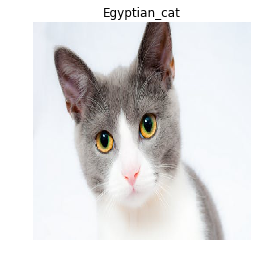

In [29]:
result,img = predictions("test/cat-pet-animal-domestic-104827.jpeg")

plt.title(result)
plt.imshow(img)
plt.axis("off")

# Thank You